<a href="https://colab.research.google.com/github/sarveswarraj/Housepriceprediction/blob/main/HOUSEPRICEPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
housing = pd.read_csv('Housing.csv')

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

<Axes: xlabel='price', ylabel='Count'>

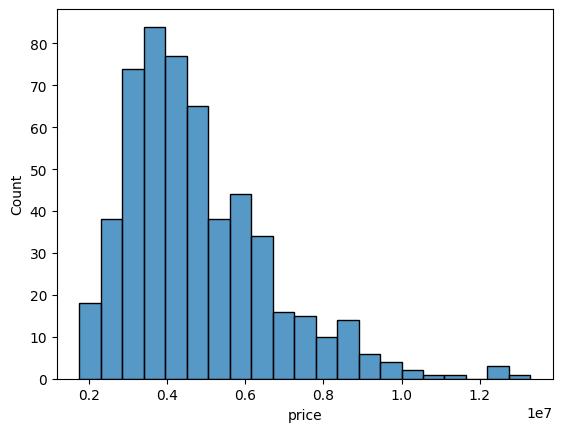

In [ ]:
sns.histplot(housing['price'])

<ipython-input-27-1d71bdbeb7e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing.corr())


<Axes: >

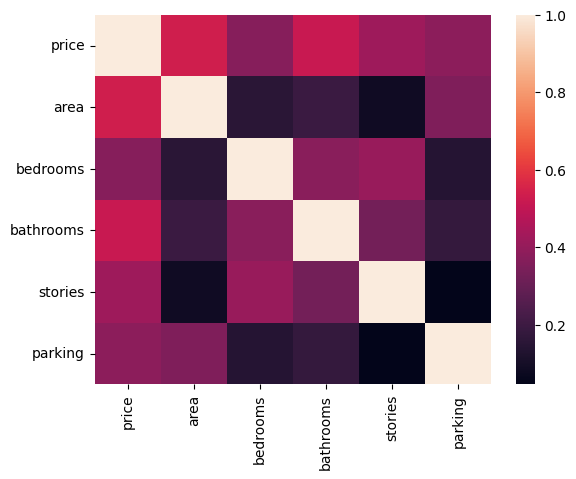

In [ ]:
sns.heatmap(housing.corr())

In [ ]:
x = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
             'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
             'parking', 'prefarea', 'furnishingstatus']]
y = housing['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

x_train_encoded = pd.get_dummies(x_train, columns=categorical_columns, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_columns, drop_first=True)

lm.fit(x_train_encoded, y_train)


LinearRegression()

In [ ]:
print(lm.intercept_)

40098.05677884538


In [ ]:
coeff_df = pd.DataFrame(lm.coef_, x_train_encoded.columns, columns=['Coefficient'])
coeff_df

,Coefficient
area,2.554999e+02
bedrooms,4.816416e+04
bathrooms,1.014275e+06
stories,4.660885e+05
parking,2.930275e+05
mainroad_yes,4.393713e+05
guestroom_yes,1.390625e+05
basement_yes,4.491869e+05
hotwaterheating_yes,7.626036e+05
airconditioning_yes,8.111055e+05


In [ ]:
predictions = lm.predict(x_test_encoded)


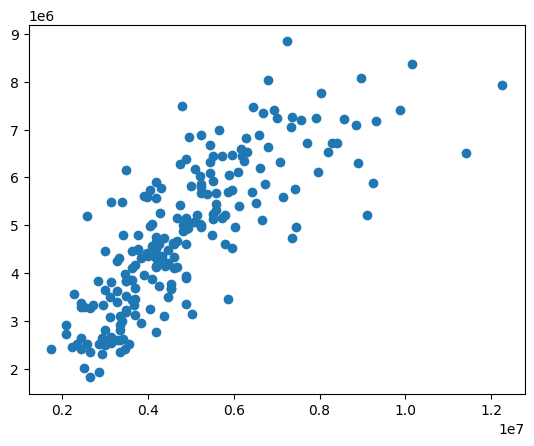

In [ ]:
plt.scatter(y_test,predictions)

<ipython-input-38-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


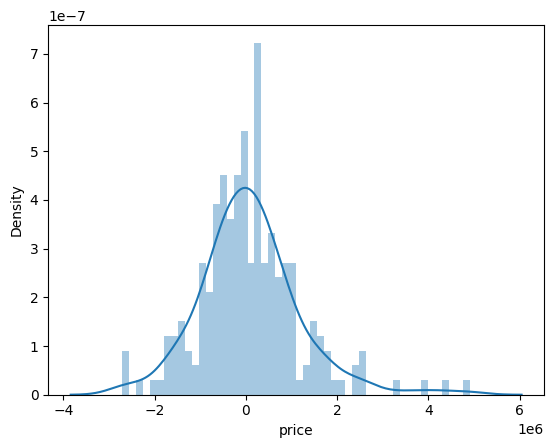

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 798540.2157757836
MSE: 1233466174021.7698
RMSE: 1110615.2232081864
